### Project 3 ###
Hey Nelson! Back with a classification job about Costa Rican Poverty Levels. My game plan is to start with SUPER DUPER simple and nieve models and then build them to be better and better! Some of my worries are about the imbalanced data, the multiple classification groups, and the amount of features. Hopefully combating these will be easy to complete with the resources I have

In [1]:

#confusion Matricies

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

### Cleaning and Visualizing Data ###

The next few cells are just to get a good idea of what our data looks like. On the back end it may or may not include the "data description.txt" file haha

In [2]:
data = pd.read_csv("C:/Users/Noah/Desktop/ECON 213/CostaRica/train.csv")
data.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [3]:
data.shape

(9557, 143)

Okay first things firss. I've heard that the data is imbalanced as far as our target variable goes, and I want to get a good visualization of that. I'm going to get a count of how many of each we have, and then of course a graph that also has shows the difference.

In [69]:
print(data.Target.describe())
print(data.Target.value_counts())

count    9557.000000
mean        3.302292
std         1.009565
min         1.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         4.000000
Name: Target, dtype: float64
4    5996
2    1597
3    1209
1     755
Name: Target, dtype: int64


([<matplotlib.axis.XTick at 0x1198e0ccac8>,
 <a list of 4 Text xticklabel objects>)

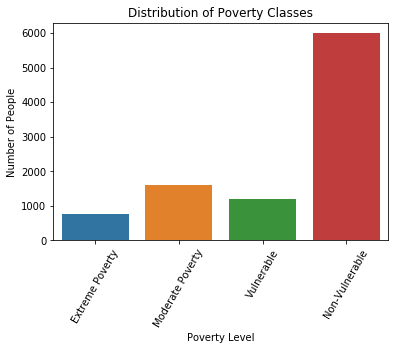

In [4]:
sns.countplot(data.Target)
plt.title('Distribution of Poverty Classes')
plt.xlabel('Poverty Level')
plt.ylabel('Number of People')
plt.xticks([0, 1, 2, 3],
           ['Extreme Poverty', 'Moderate Poverty', 'Vulnerable', 'Non-Vulnerable'], rotation = 420)

Now that we have a pretty good idea of what our target variable looks like, Let's check out the Null data. It seems that this is a very important step to take care of near the beginning of a project.

In [6]:
data.isnull().sum().sort_values(ascending=False)

rez_esc            7928
v18q1              7342
v2a1               6860
meaneduc              5
SQBmeaned             5
techozinc             0
techoentrepiso        0
techocane             0
techootro             0
cielorazo             0
abastaguadentro       0
sanitario3            0
abastaguafuera        0
abastaguano           0
public                0
planpri               0
noelec                0
coopele               0
sanitario1            0
sanitario2            0
Target                0
sanitario5            0
elimbasu4             0
etecho1               0
epared3               0
epared2               0
epared1               0
elimbasu6             0
elimbasu5             0
elimbasu3             0
                   ... 
parentesco1           0
estadocivil7          0
estadocivil6          0
estadocivil5          0
estadocivil3          0
instlevel1            0
estadocivil2          0
estadocivil1          0
female                0
male                  0
dis             

Sweet! Only 5 columns with missing data. Although these parts of the data may portray important parts of the story, for my super niave model I'm just going to drop the 5 features. I feel comfortable doing this because I have 143 features as it is. 5 less isn't that big of a deal.

In [7]:
data = data.drop(['rez_esc','v18q1','v2a1','meaneduc','SQBmeaned'], axis = 1)

In [8]:
data.isnull().sum().sort_values(ascending=False)

Target             0
planpri            0
sanitario5         0
sanitario3         0
sanitario2         0
sanitario1         0
coopele            0
noelec             0
public             0
techozinc          0
abastaguano        0
abastaguafuera     0
abastaguadentro    0
cielorazo          0
techootro          0
techocane          0
sanitario6         0
energcocinar1      0
energcocinar2      0
energcocinar3      0
energcocinar4      0
elimbasu1          0
elimbasu2          0
elimbasu3          0
elimbasu4          0
elimbasu5          0
elimbasu6          0
epared1            0
epared2            0
epared3            0
                  ..
female             0
estadocivil1       0
estadocivil2       0
estadocivil3       0
estadocivil4       0
estadocivil5       0
estadocivil6       0
estadocivil7       0
parentesco1        0
parentesco2        0
parentesco3        0
parentesco4        0
parentesco5        0
parentesco7        0
instlevel2         0
parentesco8        0
parentesco9  

Once again let's dumb down our features a bit just to keep things running quickly and so we can get a good idea of what we may have. I'm only going to grab numerical data first because I think it is super easy to work with. Also because we just will have numerical data we can run some correlations to see what things are most correlated with our target variable. With the house pricing lab it was enough to just use the 10 most correlated things to predict housing prices to a fairly accurate price level.

In [71]:
ndata = data.select_dtypes(include=[np.number])
corr = ndata.corr()
print(corr['Target'].sort_values(ascending=False)[:13])
print('')
print(corr['Target'].sort_values(ascending=False)[:-13:-1])
ndata.shape

Target         1.000000
cielorazo      0.304421
escolari       0.302305
SQBescolari    0.296577
eviv3          0.294222
epared3        0.292451
pisomoscer     0.280284
paredblolad    0.261274
etecho3        0.257378
SQBedjefe      0.246368
v18q           0.238864
rooms          0.226208
instlevel8     0.214351
Name: Target, dtype: float64

elimbasu5               NaN
hogar_nin         -0.328199
r4t1              -0.316745
SQBhogar_nin      -0.311186
overcrowding      -0.289110
SQBovercrowding   -0.258744
r4m1              -0.253163
r4h1              -0.229889
eviv1             -0.208038
pisocemento       -0.205439
epared1           -0.203025
hacdor            -0.191714
Name: Target, dtype: float64


(9557, 133)

I have printed the most positively correlated and the most negatively correlated features for which to build my first model off of. The highest is about .3, and the lowest is -.32. I'm hoping that between these 23 features I can get an f1 higher than .70. From there I should be able to make a model that rocks that up to about .85. *crosses fingers* 

In [10]:
train = data[['cielorazo','escolari','SQBescolari','eviv3','epared3','pisomoscer','paredblolad','etecho3','SQBedjefe','v18q','rooms','instlevel8','hogar_nin','r4t1','SQBhogar_nin','overcrowding','SQBovercrowding','r4m1','r4h1','eviv1','pisocemento','epared1','hacdor']]
train.head()

,cielorazo,escolari,SQBescolari,eviv3,epared3,pisomoscer,paredblolad,etecho3,SQBedjefe,v18q,...,r4t1,SQBhogar_nin,overcrowding,SQBovercrowding,r4m1,r4h1,eviv1,pisocemento,epared1,hacdor
0,1,10,100,0,0,1,1,0,100,0,...,0,0,1.000000,1.000000,0,0,1,0,0,0
1,1,12,144,0,0,0,0,0,144,1,...,0,0,1.000000,1.000000,0,0,0,0,0,0
2,1,11,121,1,0,1,0,1,0,0,...,0,0,0.500000,0.250000,0,0,0,0,0,0
3,1,9,81,1,1,1,1,1,121,1,...,1,4,1.333333,1.777778,1,0,0,0,0,0
4,1,11,121,1,1,1,1,1,121,1,...,1,4,1.333333,1.777778,1,0,0,0,0,0


### Model Creation ###

In [11]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score, classification_report

When Tyler did his example in class I REALLY liked how he worked through one hyper-parameter at a time and just tuned his models that way. It made a lot of sense to me and with only 23 features I'm hoping that each fit will take less than a minute. I'm going to start with a Random Forest because THEY MAKE SO MUCH SENSE TO ME. I understand how to tune them depending on what my f1 scores are. This will be very helpful

In [12]:
y = data.Target
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.20, random_state=42)

The first thing I want to check is whether or not I need to have a balanced class weight or no weights at all. When Tyler did this it drastically was changing his scores because he had imbalanced classes as well. I, however, will start here.

In [20]:
param_dictionary = {'class_weight':['balanced',None]}
#max_depth = [1, 3, 5, 10]
#class_weights = ['balanced', None]

clf = RandomForestClassifier(n_jobs = -1, max_depth = 3, n_estimators = 1000)
gs = GridSearchCV(clf, param_dictionary, n_jobs=-1, scoring = 'f1_weighted', verbose = 2)
gs.fit(X_train, y_train)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:   11.4s remaining:   11.4s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:   17.7s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'class_weight': ['balanced', None]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1_weighted', verbose=2)

In [21]:
gs.cv_results_

C:\Users\Noah\Anaconda33\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Noah\Anaconda33\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Noah\Anaconda33\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Noah\Anaconda33\lib\site-packages\sklearn\util

{'mean_fit_time': array([3.5401632, 4.2722315]),
 'std_fit_time': array([0.48070293, 0.16427516]),
 'mean_score_time': array([0.80063788, 0.84469414]),
 'std_score_time': array([0.10280517, 0.14962726]),
 'param_class_weight': masked_array(data=['balanced', None],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'params': [{'class_weight': 'balanced'}, {'class_weight': None}],
 'split0_test_score': array([0.57128194, 0.53506994]),
 'split1_test_score': array([0.56849657, 0.54084713]),
 'split2_test_score': array([0.55380452, 0.54060545]),
 'mean_test_score': array([0.56453084, 0.53883962]),
 'std_test_score': array([0.00766651, 0.0026687 ]),
 'rank_test_score': array([1, 2]),
 'split0_train_score': array([0.59798637, 0.5414148 ]),
 'split1_train_score': array([0.57093527, 0.5372101 ]),
 'split2_train_score': array([0.56630316, 0.54001358]),
 'mean_train_score': array([0.57840827, 0.53954616]),
 'std_train_score': array([0.01397237, 0.00174809])}

Interesting. I was expecting a bigger gap between my two scores. Neither parameter seem to be over-fitting an extra ordinary amount, so I'll just go with balanced because it does a smidge better.

Next I want to check the size of my forest. I'm going from a very small forest to a very large forest. I'm worried that the size 100 won't be enough to predict well, but that the 2500 will over fit too hard. Let's see.

In [14]:
param_dictionary = {'n_estimators':[100, 500, 1000, 2500]}
#max_depth = [1, 3, 5, 10]
#class_weights = ['balanced', None]

clf = RandomForestClassifier(n_jobs = -1, max_depth = 3, class_weight = 'balanced')
gs = GridSearchCV(clf, param_dictionary, n_jobs=-1, scoring = 'f1_weighted', verbose = 2)
gs.fit(X_train, y_train)
 

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Done   4 out of  12 | elapsed:   15.5s remaining:   31.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   36.6s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=3, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=-1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [100, 500, 1000, 2500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1_weighted', verbose=2)

In [15]:
gs.cv_results_

C:\Users\Noah\Anaconda33\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Noah\Anaconda33\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Noah\Anaconda33\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Noah\Anaconda33\lib\site-packages\sklearn\util

{'mean_fit_time': array([ 0.3772521 ,  1.79095292,  4.45635398, 12.70527093]),
 'std_fit_time': array([0.02797391, 0.05893381, 0.63631277, 0.04684218]),
 'mean_score_time': array([0.66566865, 0.45675031, 0.97592918, 1.80752571]),
 'std_score_time': array([0.63277541, 0.04891316, 0.12994891, 0.05288604]),
 'param_n_estimators': masked_array(data=[100, 500, 1000, 2500],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 100},
  {'n_estimators': 500},
  {'n_estimators': 1000},
  {'n_estimators': 2500}],
 'split0_test_score': array([0.56350834, 0.56890255, 0.57188222, 0.56900261]),
 'split1_test_score': array([0.54973353, 0.56744401, 0.56975469, 0.56859955]),
 'split2_test_score': array([0.55068155, 0.5579611 , 0.55631024, 0.56058342]),
 'mean_test_score': array([0.55464398, 0.56477119, 0.56598519, 0.56606334]),
 'std_test_score': array([0.00628305, 0.00485027, 0.00689349, 0.00387687]),
 'rank_test_score': array

Surprisngly they all preformed at basically the same level! Wow. I'll probably just keep it at 500 because I don't think that will take too much computing power, but will still be enough that if our model get's a little psychedelic it should still predict well.

Next let's check the depth of each tree. I have 1 in there to see if stumping it will be good, and 10 splits could also be reasonable because I have 23 different features. They're needs to be quite a few splits to differentiate all of those!

In [16]:
param_dictionary = {'max_depth':[1,3,5,10]}
#max_depth = [1, 3, 5, 10]
#class_weights = ['balanced', None]

clf = RandomForestClassifier(n_jobs = -1,  n_estimators = 500, class_weight = 'balanced')
gs = GridSearchCV(clf, param_dictionary, n_jobs=-1, scoring = 'f1_weighted', verbose = 2)
gs.fit(X_train, y_train)
 

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Done   4 out of  12 | elapsed:   10.1s remaining:   20.3s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   20.2s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [1, 3, 5, 10]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='f1_weighted',
       verbose=2)

In [17]:
gs.cv_results_

C:\Users\Noah\Anaconda33\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Noah\Anaconda33\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Noah\Anaconda33\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Noah\Anaconda33\lib\site-packages\sklearn\util

{'mean_fit_time': array([1.7358199 , 1.86474975, 2.94718806, 3.2636466 ]),
 'std_fit_time': array([0.03983789, 0.04909927, 0.87667389, 0.34646745]),
 'mean_score_time': array([0.45822533, 0.51992234, 0.78270205, 0.8365473 ]),
 'std_score_time': array([0.04910835, 0.00159718, 0.22360893, 0.20483824]),
 'param_max_depth': masked_array(data=[1, 3, 5, 10],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 1},
  {'max_depth': 3},
  {'max_depth': 5},
  {'max_depth': 10}],
 'split0_test_score': array([0.52741116, 0.57408035, 0.60053331, 0.73869543]),
 'split1_test_score': array([0.51923012, 0.56309027, 0.60547587, 0.7426388 ]),
 'split2_test_score': array([0.51702373, 0.561596  , 0.58823682, 0.72495492]),
 'mean_test_score': array([0.52122384, 0.5662582 , 0.59808393, 0.73543194]),
 'std_test_score': array([0.00446893, 0.00556732, 0.00724688, 0.00757847]),
 'rank_test_score': array([4, 3, 2, 1]),
 'split0_train_score'

I have a very difficult choice to make now. 1-5 are awful models. .6 for my f1 just isn't acceptable. Buuut am I willing to increase that by .13 when I KNOW I'm overfitting significantly? I'm going to try a few deeper trees just to check out if I can bump up training and testing scores while keeping a similar level of overfitting that I can work on later.

In [18]:
param_dictionary = {'max_depth':[10,15,20,50]}
#max_depth = [1, 3, 5, 10]
#class_weights = ['balanced', None]

clf = RandomForestClassifier(n_jobs = -1,  n_estimators = 1000, class_weight = 'balanced')
gs = GridSearchCV(clf, param_dictionary, n_jobs=-1, scoring = 'f1_weighted', verbose = 2)
gs.fit(X_train, y_train)
 

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Done   4 out of  12 | elapsed:   18.1s remaining:   36.4s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   38.1s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [10, 15, 20, 50]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='f1_weighted',
       verbose=2)

In [19]:
gs.cv_results_

C:\Users\Noah\Anaconda33\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Noah\Anaconda33\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Noah\Anaconda33\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Noah\Anaconda33\lib\site-packages\sklearn\util

{'mean_fit_time': array([ 5.14751132,  6.45698404,  9.45510729, 10.40600332]),
 'std_fit_time': array([0.88846846, 0.22353188, 2.05668979, 1.06113751]),
 'mean_score_time': array([1.25814247, 1.13346982, 1.75302076, 2.2511843 ]),
 'std_score_time': array([0.01143972, 0.0544212 , 0.31641829, 0.36896282]),
 'param_max_depth': masked_array(data=[10, 15, 20, 50],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 10},
  {'max_depth': 15},
  {'max_depth': 20},
  {'max_depth': 50}],
 'split0_test_score': array([0.75134977, 0.8310581 , 0.82818947, 0.82725516]),
 'split1_test_score': array([0.74687592, 0.83932767, 0.83519373, 0.83815148]),
 'split2_test_score': array([0.72694951, 0.82206699, 0.81770482, 0.8192459 ]),
 'mean_test_score': array([0.74172952, 0.83081879, 0.82703086, 0.82821843]),
 'std_test_score': array([0.01060544, 0.00704752, 0.00718555, 0.00774694]),
 'rank_test_score': array([4, 1, 3, 2]),
 'split0_tr

It seems that a max depth of 15 is going to potentially give me the best shot at getting a good score. I'm overfitting by a lot, but as I make my model more simple that should helpe a bunch! I'm going to get rid of all the features that are negatively correlated and just use the 10 or 12 that were most positively correlated. I'm also going to try 10 and 15 for my max depths. I want to try less again because I have less features

In [22]:
train2 = data[['cielorazo','escolari','SQBescolari','eviv3','epared3','pisomoscer','paredblolad','etecho3','SQBedjefe','v18q','rooms','instlevel8']]
X_train2, X_test2, y_train2, y_test2 = train_test_split(train2, y, test_size=0.20, random_state=42)

In [72]:
param_dictionary = {'max_depth':[7,10,15]}
clf = RandomForestClassifier(n_jobs = -1,  n_estimators = 1000, class_weight = 'balanced')
gs = GridSearchCV(clf, param_dictionary, n_jobs=-1, scoring = 'f1_weighted', verbose = 2)
gs.fit(X_train2, y_train2)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Done   4 out of   9 | elapsed:    7.6s remaining:    9.5s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:   13.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:   13.4s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [7, 10, 15]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='f1_weighted',
       verbose=2)

In [73]:
gs.cv_results_

C:\Users\Noah\Anaconda33\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Noah\Anaconda33\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Noah\Anaconda33\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Noah\Anaconda33\lib\site-packages\sklearn\util

{'mean_fit_time': array([1.88016208, 2.5603207 , 3.20715984]),
 'std_fit_time': array([0.26557026, 0.18181746, 0.21728922]),
 'mean_score_time': array([0.48584255, 0.64644607, 0.59561261]),
 'std_score_time': array([0.05675522, 0.05207761, 0.19613057]),
 'param_max_depth': masked_array(data=[7, 10, 15],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 7}, {'max_depth': 10}, {'max_depth': 15}],
 'split0_test_score': array([0.58462848, 0.61879107, 0.62566576]),
 'split1_test_score': array([0.56944427, 0.62574786, 0.64330796]),
 'split2_test_score': array([0.55961758, 0.61126144, 0.6219894 ]),
 'mean_test_score': array([0.57123514, 0.61860113, 0.63032091]),
 'std_test_score': array([0.0102892 , 0.00591461, 0.00930419]),
 'rank_test_score': array([3, 2, 1]),
 'split0_train_score': array([0.62769788, 0.74238923, 0.86560503]),
 'split1_train_score': array([0.61581762, 0.73863736, 0.86175655]),
 'split2_train_score': array

Well that is just horrible. I don't quite understand though. I thought if you were over fitting that simplifying a model was the way to cut into that over fitting. Yikes. Well, let's try the opposite! I'm going to throw in ALL 133 features and see what our puppy pops out. 

In [42]:
ndata.drop(axis = 1, columns = ['Target'], inplace = True) 
X_trainn, X_testn, y_trainn, y_testn = train_test_split(ndata, y, test_size=0.20, random_state=42)

C:\Users\Noah\Anaconda33\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [74]:
param_dictionary = {'max_depth':[10,15,30]}
clf = RandomForestClassifier(n_jobs = -1,  n_estimators = 1000, max_depth = 15, class_weight = 'balanced')
gs = GridSearchCV(clf, param_dictionary, n_jobs=-1, scoring = 'f1_weighted', verbose = 2)
gs.fit(X_trainn, y_trainn)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Done   4 out of   9 | elapsed:   11.1s remaining:   13.9s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:   24.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:   24.5s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=15, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [10, 15, 30]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='f1_weighted',
       verbose=2)

In [76]:
gs.cv_results_

C:\Users\Noah\Anaconda33\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Noah\Anaconda33\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Noah\Anaconda33\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Noah\Anaconda33\lib\site-packages\sklearn\util

{'mean_fit_time': array([2.59160813, 4.33207758, 9.13894661]),
 'std_fit_time': array([0.55381489, 0.38937587, 0.51133914]),
 'mean_score_time': array([0.5119652 , 1.04634507, 0.53114748]),
 'std_score_time': array([0.08104208, 0.08163421, 0.09937777]),
 'param_max_depth': masked_array(data=[10, 15, 30],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 10}, {'max_depth': 15}, {'max_depth': 30}],
 'split0_test_score': array([0.78995559, 0.84459427, 0.83561994]),
 'split1_test_score': array([0.7998876 , 0.86527169, 0.85275664]),
 'split2_test_score': array([0.77985087, 0.84676233, 0.83547477]),
 'mean_test_score': array([0.78989935, 0.85220815, 0.84128306]),
 'std_test_score': array([0.00817872, 0.00927873, 0.00811247]),
 'rank_test_score': array([3, 1, 2]),
 'split0_train_score': array([0.92164316, 0.99764088, 1.        ]),
 'split1_train_score': array([0.91125937, 0.99862645, 1.        ]),
 'split2_train_score': arr

GRRRR still overfitting a ton. Let me drop the n_estimators again and see if that is my problem.

In [77]:
param_dictionary = {'n_estimators':[50,100,500,1000]}
clf = RandomForestClassifier(n_jobs = -1, max_depth = 12, class_weight = 'balanced')
gs = GridSearchCV(clf, param_dictionary, n_jobs=-1, scoring = 'f1_weighted', verbose = 2)
gs.fit(X_trainn, y_trainn)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Done   4 out of  12 | elapsed:    4.0s remaining:    8.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   14.7s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=12, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=-1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1_weighted', verbose=2)

In [78]:
gs.cv_results_

C:\Users\Noah\Anaconda33\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Noah\Anaconda33\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Noah\Anaconda33\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Noah\Anaconda33\lib\site-packages\sklearn\util

{'mean_fit_time': array([0.1513199 , 0.29151551, 1.7644697 , 5.74315246]),
 'std_fit_time': array([0.00365055, 0.01203207, 0.46941196, 0.57235086]),
 'mean_score_time': array([0.10703468, 0.14062405, 0.53889267, 0.75842341]),
 'std_score_time': array([0.00047798, 0.04795485, 0.05857628, 0.19520868]),
 'param_n_estimators': masked_array(data=[50, 100, 500, 1000],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 50},
  {'n_estimators': 100},
  {'n_estimators': 500},
  {'n_estimators': 1000}],
 'split0_test_score': array([0.82113415, 0.82323382, 0.83153116, 0.8321013 ]),
 'split1_test_score': array([0.83540334, 0.83950906, 0.84707442, 0.84581016]),
 'split2_test_score': array([0.80620271, 0.81733772, 0.82311809, 0.8187843 ]),
 'mean_test_score': array([0.82091538, 0.82669385, 0.83390868, 0.83223365]),
 'std_test_score': array([0.01192016, 0.00937513, 0.00992213, 0.01103185]),
 'rank_test_score': array([4, 3, 

At this point I'm not sure there is much modeling tweaks I can make to do much better than that without going into feature engineering. That's okay! I want to try a K-Nearest Neighbors model real quick and then I'll go come back to my random forest with some oversampling.

### K-Nearest Neighbors ###

I'm going to try the same tactic by going one parameter at a time and seeing what works well with my data. I'll be doing it with my first training set of data that had about 20 features. I'm nervous to try it with all 133 features because of that evil and destructive curse of dimensionality.

In [55]:
from sklearn.neighbors import KNeighborsClassifier
param_dictionary = {'algorithm':['ball_tree','kd_tree']}
clf = KNeighborsClassifier(n_neighbors = 3, )
gs = GridSearchCV(clf, param_dictionary, n_jobs=-1, scoring = 'f1_weighted', verbose = 2)
gs.fit(X_train, y_train)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    6.7s remaining:    6.7s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:   10.6s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'algorithm': ['ball_tree', 'kd_tree']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1_weighted', verbose=2)

In [56]:
gs.cv_results_

C:\Users\Noah\Anaconda33\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Noah\Anaconda33\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Noah\Anaconda33\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Noah\Anaconda33\lib\site-packages\sklearn\util

{'mean_fit_time': array([0.02672919, 0.02362641]),
 'std_fit_time': array([0.01148236, 0.00700507]),
 'mean_score_time': array([0.22094782, 0.0808181 ]),
 'std_score_time': array([0.03491352, 0.02149258]),
 'param_algorithm': masked_array(data=['ball_tree', 'kd_tree'],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'params': [{'algorithm': 'ball_tree'}, {'algorithm': 'kd_tree'}],
 'split0_test_score': array([0.59341911, 0.59443865]),
 'split1_test_score': array([0.60078897, 0.59959049]),
 'split2_test_score': array([0.59755385, 0.59739934]),
 'mean_test_score': array([0.59725294, 0.59714209]),
 'std_test_score': array([0.00301663, 0.00211135]),
 'rank_test_score': array([1, 2]),
 'split0_train_score': array([0.77059598, 0.7707506 ]),
 'split1_train_score': array([0.77580873, 0.77625935]),
 'split2_train_score': array([0.78147457, 0.78169698]),
 'mean_train_score': array([0.77595976, 0.77623564]),
 'std_train_score': array([0.00444245, 0.00446887

Well those are both equally awful

Let's try different numbers of neighbors that can 'vote'!

In [58]:
param_dictionary = {'n_neighbors':[1,3,5,10]}
clf = KNeighborsClassifier(algorithm = 'ball_tree', )
gs = GridSearchCV(clf, param_dictionary, n_jobs=-1, scoring = 'f1_weighted', verbose = 2)
gs.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Done   4 out of  12 | elapsed:    6.9s remaining:   14.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   14.0s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': [1, 3, 5, 10]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='f1_weighted',
       verbose=2)

In [59]:
gs.cv_results_

C:\Users\Noah\Anaconda33\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Noah\Anaconda33\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Noah\Anaconda33\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Noah\Anaconda33\lib\site-packages\sklearn\util

{'mean_fit_time': array([0.02808833, 0.02821302, 0.02848538, 0.02335207]),
 'std_fit_time': array([0.0083323 , 0.01278608, 0.00591575, 0.0042196 ]),
 'mean_score_time': array([0.21105822, 0.22197564, 0.33626405, 0.36661609]),
 'std_score_time': array([0.03369901, 0.01410997, 0.06124148, 0.02017055]),
 'param_n_neighbors': masked_array(data=[1, 3, 5, 10],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 1},
  {'n_neighbors': 3},
  {'n_neighbors': 5},
  {'n_neighbors': 10}],
 'split0_test_score': array([0.62686668, 0.59341911, 0.5837184 , 0.57902614]),
 'split1_test_score': array([0.6322632 , 0.60078897, 0.60424188, 0.59208965]),
 'split2_test_score': array([0.63011436, 0.59755385, 0.5963759 , 0.58437784]),
 'mean_test_score': array([0.62974728, 0.59725294, 0.59477563, 0.58516304]),
 'std_test_score': array([0.00221863, 0.00301663, 0.00845577, 0.00536265]),
 'rank_test_score': array([1, 2, 3, 4]),
 'split0_tr

Yikes..... They're all horrible Nelson! Overfitting on the low side and just plain BAD on the large side! Mayve weighting things differently will make our f1 better? I'll keep my n_neighbors at 10 to see how it effects a number that isn't overfitting a crazy ton

In [60]:
param_dictionary = {'weights':['uniform','distance']}
clf = KNeighborsClassifier(algorithm = 'ball_tree', n_neighbors = 10 )
gs = GridSearchCV(clf, param_dictionary, n_jobs=-1, scoring = 'f1_weighted', verbose = 2)
gs.fit(X_train, y_train)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    6.0s remaining:    6.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:   10.4s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1_weighted', verbose=2)

In [61]:
gs.cv_results_

C:\Users\Noah\Anaconda33\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Noah\Anaconda33\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Noah\Anaconda33\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Noah\Anaconda33\lib\site-packages\sklearn\util

{'mean_fit_time': array([0.02383931, 0.0223194 ]),
 'std_fit_time': array([0.00579015, 0.00783267]),
 'mean_score_time': array([0.28040973, 0.30153688]),
 'std_score_time': array([0.02054649, 0.04091048]),
 'param_weights': masked_array(data=['uniform', 'distance'],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'params': [{'weights': 'uniform'}, {'weights': 'distance'}],
 'split0_test_score': array([0.57902614, 0.65158109]),
 'split1_test_score': array([0.59208965, 0.66650489]),
 'split2_test_score': array([0.58437784, 0.66238232]),
 'mean_test_score': array([0.58516304, 0.66015357]),
 'std_test_score': array([0.00536265, 0.00629376]),
 'rank_test_score': array([2, 1]),
 'split0_train_score': array([0.64710445, 0.9874393 ]),
 'split1_train_score': array([0.64087054, 0.9896071 ]),
 'split2_train_score': array([0.64775602, 0.9890289 ]),
 'mean_train_score': array([0.64524367, 0.98869177]),
 'std_train_score': array([0.00310369, 0.00091654])}

Uhh.. Just as awful. Just for kicks and giggles lets run a K-Nearest Neighbors on my 133 feature set of data as well as my 10 feature set of data and see if they change anything. I'll throw on weights and neighbors I'll keep at 10

In [80]:
param_dictionary = {'algorithm':['ball_tree','kd_tree']}
clf = KNeighborsClassifier(n_neighbors = 10, weights = 'distance')
gs = GridSearchCV(clf, param_dictionary, n_jobs=-1, scoring = 'f1_weighted', verbose = 2)
gs.fit(X_train2, y_train2)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    2.6s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    4.5s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='distance'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'algorithm': ['ball_tree', 'kd_tree']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1_weighted', verbose=2)

In [81]:
gs.cv_results_

C:\Users\Noah\Anaconda33\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Noah\Anaconda33\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Noah\Anaconda33\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Noah\Anaconda33\lib\site-packages\sklearn\util

{'mean_fit_time': array([0.00765379, 0.00663471]),
 'std_fit_time': array([0.00169318, 0.00043564]),
 'mean_score_time': array([0.05911271, 0.03491497]),
 'std_score_time': array([0.00503735, 0.00081889]),
 'param_algorithm': masked_array(data=['ball_tree', 'kd_tree'],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'params': [{'algorithm': 'ball_tree'}, {'algorithm': 'kd_tree'}],
 'split0_test_score': array([0.59147215, 0.59008772]),
 'split1_test_score': array([0.60545918, 0.6050912 ]),
 'split2_test_score': array([0.59873593, 0.59604229]),
 'mean_test_score': array([0.59855388, 0.59707204]),
 'std_test_score': array([0.00571238, 0.00616904]),
 'rank_test_score': array([1, 2]),
 'split0_train_score': array([0.88481656, 0.88481656]),
 'split1_train_score': array([0.88533555, 0.88533555]),
 'split2_train_score': array([0.88635645, 0.88635645]),
 'mean_train_score': array([0.88550285, 0.88550285]),
 'std_train_score': array([0.00063969, 0.00063969

Super simple data set = BLEH

In [82]:
param_dictionary = {'algorithm':['ball_tree','kd_tree']}
clf = KNeighborsClassifier(n_neighbors = 10, weights = 'distance')
gs = GridSearchCV(clf, param_dictionary, n_jobs=-1, scoring = 'f1_weighted', verbose = 2)
gs.fit(X_trainn, y_trainn)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    3.4s remaining:    3.4s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    5.5s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='distance'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'algorithm': ['ball_tree', 'kd_tree']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1_weighted', verbose=2)

In [83]:
gs.cv_results_

C:\Users\Noah\Anaconda33\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Noah\Anaconda33\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Noah\Anaconda33\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Noah\Anaconda33\lib\site-packages\sklearn\util

{'mean_fit_time': array([0.04986699, 0.04290764]),
 'std_fit_time': array([0.01095596, 0.00847614]),
 'mean_score_time': array([0.23271171, 0.19721293]),
 'std_score_time': array([0.02187088, 0.03416337]),
 'param_algorithm': masked_array(data=['ball_tree', 'kd_tree'],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'params': [{'algorithm': 'ball_tree'}, {'algorithm': 'kd_tree'}],
 'split0_test_score': array([0.53655832, 0.53655832]),
 'split1_test_score': array([0.5472562, 0.5472562]),
 'split2_test_score': array([0.5413636, 0.5413636]),
 'mean_test_score': array([0.54172473, 0.54172473]),
 'std_test_score': array([0.00437542, 0.00437542]),
 'rank_test_score': array([1, 1]),
 'split0_train_score': array([1., 1.]),
 'split1_train_score': array([1., 1.]),
 'split2_train_score': array([1., 1.]),
 'mean_train_score': array([1., 1.]),
 'std_train_score': array([0., 0.])}

And the overfitting champion of champions is K-Nearest Neighbors on a data set with 133 features. You, my friend, are a horrible model.

### Feature Engineering ###

The idea behind oversampling is to create synthetic data points in the categories that have way less data in order to make it more "fair" on your model. I obviously am going to be trying this with my random forest and NOT my K-Nearest Neighbors.

In [95]:
from imblearn.over_sampling import RandomOverSampler


In [98]:
random = RandomOverSampler(random_state=0)
x_trainn, y_trainn = random.fit_resample(X_trainn, y_trainn)

AttributeError: 'RandomOverSampler' object has no attribute 'fit_resample'

Nelson I'm going to get level with you. My anaconda prompt just had a spazz attack when I tried to install imblearn onto my jupyter notebook. For some reason it read in at least half of it, but I can't figure out why I can't fit_resample. I went to their webiste ( https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.RandomOverSampler.html#imblearn.over_sampling.RandomOverSampler ) and it even says "In all cases use fit_resample" sooooo... I have no idea what to do! BUT I PROMISE THAT A RANDOM FOREST WITH OVER SAMPLING WOULD'VE BEEN super awesome and I think would've helped my model. I think with the problems I was having with getting my f1 score higher, more data couldn't have hurt. 

All in all, although I don't have a perfectly tuned model, I think my final random forest models were actually pretty good. If I were to submit some predictions to Kaggle obviously I'd set some predictions and throw them into another CSV but I'm not going to do that because I don't need to! The rubric says that 5% of our grade is our result on Kaggle but I remember you specifically telling us that we didn't need to do that. 

As far as the Homework Questions go, I think most of them I answered between each run of my models. If I were a company I would use my model as a screening because I think it does as well as a middle school nurse does on her scoliosis screenings. I think it predicts pretty well whether or not the family is at risk for poverty or not, but lacks in differentiating between poverty groups. If I could get the over sampling to work then this would change.

In [101]:
#Thanks Nelson!